In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


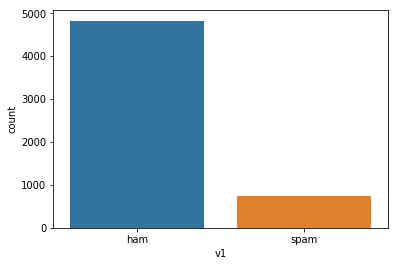

In [6]:
sns.countplot(df['v1'])

In [7]:
X = df['v2']
Y = df['v1']

In [8]:
label = LabelEncoder()

In [10]:
Y = label.fit_transform(Y)
Y = Y.reshape(-1,1)

In [13]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [15]:
max_words = 1000
max_len = 150

In [16]:
tok = Tokenizer(num_words=max_words)

In [17]:
tok.fit_on_texts(X_train)

In [18]:
seqs = tok.texts_to_sequences(X_train)

In [19]:
ses_matrix = sequence.pad_sequences(seqs,maxlen=max_len)

In [20]:
ses_matrix.shape

(4736, 150)

In [21]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim=max_words,output_dim=50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256)(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model    

In [22]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [23]:
model.fit(ses_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 13s 3ms/step - loss: 0.3414 - accuracy: 0.8617 - val_loss: 0.1596 - val_accuracy: 0.9673
Epoch 2/10
3788/3788 [==============================] - 10s 3ms/step - loss: 0.0860 - accuracy: 0.9799 - val_loss: 0.0671 - val_accuracy: 0.9789
Epoch 3/10
3788/3788 [==============================] - 10s 3ms/step - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.0571 - val_accuracy: 0.9821
Epoch 4/10
3788/3788 [==============================] - 10s 3ms/step - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0521 - val_accuracy: 0.9884
Epoch 5/10
3788/3788 [==============================] - 10s 3ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0529 - val_accuracy: 0.9863


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)